# Performance analysis

In this notebook all the results obtained will be reported, with particular reference to the best configuration for each model.

## Imports

In [1]:
import os.path

import pandas as pd

from src.utils.const import MODEL_RESULTS_CSV, NETWORK_RESULT_CSV
from src.utils.util_notebook import calculate_statistics_sklearn_train, summary_statistics_model, \
    calculate_statistics_sklearn, find_max_f1_cfg, calculate_statistics_mlp_train, find_best_conf, add_value_array
from src.visualization.visualize import barplot_multiple_columns

### Useful path to data

In [2]:
RESULTS_FOLDER = os.path.join('..', MODEL_RESULTS_CSV)
MLP_RESULTS_FOLDER = os.path.join('..', NETWORK_RESULT_CSV)

## Read output csv

In [3]:
mlp_all = pd.read_csv(os.path.join(MLP_RESULTS_FOLDER, 'out_mlp_all.csv'))

svm_res = pd.read_csv(os.path.join(RESULTS_FOLDER, 'out_svm.csv'))
naive_res = pd.read_csv(os.path.join(RESULTS_FOLDER, 'best_out_naive_bayes.csv'))
tree_res = pd.read_csv(os.path.join(RESULTS_FOLDER, 'best_out_tree_based.csv'))

svm_val = pd.read_csv(os.path.join(RESULTS_FOLDER, 'out_grid_svm.csv'))
naive_val = pd.read_csv(os.path.join(RESULTS_FOLDER, 'out_grid_naive_bayes.csv'))
tree_val = pd.read_csv(os.path.join(RESULTS_FOLDER, 'out_grid_tree_based.csv'))

## Initialize output DataFrame

In [4]:
df_test_metric = pd.DataFrame()
df_train_metric = pd.DataFrame()

## Work with results

### Scikit-learn models

#### RandomForestClassifier

In [5]:
res_random_forest_train = calculate_statistics_sklearn_train(tree_val)
df_train_metric = summary_statistics_model(df_train_metric, res_random_forest_train, 'Random forest classifier',
                                           train=True)

res_random_forest = calculate_statistics_sklearn(tree_res, 'random_forest_classifier')
df_test_metric = summary_statistics_model(df_test_metric, res_random_forest, 'Random forest classifier')

Best configuration Random forest classifier mean metrics:
train f1: 0.7894708757467401 ±0.0028370536720411406
validation f1: 0.7813933618457191 ±0.0025529991410781342

Best configuration Random forest classifier mean metrics:
f1_score: 0.609756989767005 ±0.006529683898881055
loss: 0.39225757744490736 ±0.00712946750658302
acc: 0.6077424225550925 ±0.007129467506583035

Best hyperparams configuration:
["{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 700}"]


#### DecisionTreeClassifier

In [6]:
res_decision_tree_train = calculate_statistics_sklearn_train(tree_val, first=False)
df_train_metric = summary_statistics_model(df_train_metric, res_decision_tree_train, 'Decision tree classifier',
                                           train=True)

res_decision_tree = calculate_statistics_sklearn(tree_res, 'decision_tree_classifier')
df_test_metric = summary_statistics_model(df_test_metric, res_decision_tree, 'Decision tree classifier')

Best configuration Decision tree classifier mean metrics:
train f1: 0.9982448027541722 ±0.0001574523340800961
validation f1: 0.8668832921611014 ±0.0011549731147417086

Best configuration Decision tree classifier mean metrics:
f1_score: 0.6402913493313054 ±0.004216781363865863
loss: 0.36008162828469237 ±0.004052145718922026
acc: 0.6399183717153076 ±0.004052145718922028

Best hyperparams configuration:
["{'criterion': 'entropy', 'max_depth': 15}"]


#### GaussianNB

In [7]:
res_gaussian_nb_train = calculate_statistics_sklearn_train(naive_val)
df_train_metric = summary_statistics_model(df_train_metric, res_gaussian_nb_train, 'GaussianNB', train=True)

res_gaussian_nb = calculate_statistics_sklearn(naive_res, 'gaussian_nb')
df_test_metric = summary_statistics_model(df_test_metric, res_gaussian_nb, 'GaussianNB')

Best configuration GaussianNB mean metrics:
train f1: 0.7216627770722026 ±0.00336266744134676
validation f1: 0.7074634406645496 ±0.003231430093703336

Best configuration GaussianNB mean metrics:
f1_score: 0.4526802764969494 ±0.010686051270129714
loss: 0.5481864029029817 ±0.010409238716856704
acc: 0.4518135970970182 ±0.010409238716856686

Best hyperparams configuration:
["{'var_smoothing': 8.111308307896872e-07}"]


#### QDA

In [8]:
res_qda_train = calculate_statistics_sklearn_train(naive_val, first=False)
df_train_metric = summary_statistics_model(df_train_metric, res_qda_train, 'QDA', train=True)

res_qda = calculate_statistics_sklearn(naive_res, 'qda')
df_test_metric = summary_statistics_model(df_test_metric, res_qda, 'QDA')

Best configuration QDA mean metrics:
train f1: 0.9870351447504125 ±0.00035963628820091814
validation f1: 0.8985859150139989 ±0.0007798478399543219

Best configuration QDA mean metrics:
f1_score: 0.5217235201683785 ±0.007963795942101407
loss: 0.4649740608914607 ±0.00827922547607728
acc: 0.5350259391085392 ±0.00827922547607726

Best hyperparams configuration:
["{'reg_param': 0.001, 'tol': 0.0001}"]


#### SVM

In [9]:
res_svm_train = calculate_statistics_sklearn_train(svm_val)
df_train_metric = summary_statistics_model(df_train_metric, res_svm_train, 'SVM', train=True)

res_svm = calculate_statistics_sklearn(svm_res, 'svc')
df_test_metric = summary_statistics_model(df_test_metric, res_svm, 'SVM')

Best configuration SVM mean metrics:
train f1: 0.9999782608688632 ±1.1833105435719024e-05
validation f1: 0.9613343635021987 ±0.000923195543662202

Best configuration SVM mean metrics:
f1_score: 0.8286206857647119 ±0.004227564469616818
loss: 0.17076133850717423 ±0.004051273714411658
acc: 0.8292386614928257 ±0.004051273714411657

Best hyperparams configuration:
["{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"]


### MovieNet (MLP)

In [10]:
mlp_all

,Unnamed: 0,cfg,fold,loss_test,acc_test,f1_test,mean_loss,std_loss,mean_acc_val,std_acc_val,mean_acc_train,std_acc_train,mean_f1_train,std_f1_train,mean_f1_val,std_f1_val
0,0,0,1,0.372040,85.285171,0.853134,0.306360,0.017720,79.643519,0.993016,87.469802,0.759901,0.873412,0.007689,0.797929,0.009758
1,1,1,1,0.344320,85.171103,0.852068,0.302731,0.020831,79.783835,0.788934,87.632241,0.883383,0.875075,0.008986,0.799156,0.007691
2,2,2,1,0.361184,85.285171,0.853100,0.304689,0.018806,79.536465,0.954451,87.559346,0.787205,0.874340,0.008016,0.796486,0.009295
3,3,3,1,0.352550,85.817490,0.858861,0.306855,0.018824,79.500103,1.004205,87.455783,0.799693,0.873303,0.008139,0.795906,0.010032
4,4,4,1,2.237197,10.798479,0.097864,0.673969,0.734426,65.168832,28.681150,73.078158,28.773956,0.713885,0.318954,0.647411,0.297186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,955,187,5,0.481808,80.486877,0.805378,1.271628,0.869597,44.391021,33.047878,50.101529,33.251459,0.466255,0.365353,0.429138,0.345926
956,956,188,5,2.295036,16.774439,0.102313,1.276690,0.870067,44.191214,33.077768,49.910281,33.267216,0.464154,0.365526,0.427009,0.346253
957,957,189,5,2.289519,16.127805,0.101492,1.281689,0.870492,43.989620,33.109832,49.726107,33.276257,0.462157,0.365599,0.424895,0.346572
958,958,190,5,2.261616,19.475086,0.166811,1.286323,0.870557,43.820917,33.105664,49.545093,33.282774,0.460186,0.365651,0.423049,0.346610


In [11]:
best_cfg = find_max_f1_cfg(mlp_all)
print(f'Indices of the best configurations: {best_cfg}')

Indices of the best configurations: [0. 1. 2. 3.]


In [12]:
res_mlp_train = calculate_statistics_mlp_train(3, mlp_all)
df_train_metric = summary_statistics_model(df_train_metric, res_mlp_train, 'MLP', train=True)

res_mlp = find_best_conf(best_cfg, mlp_all)
df_test_metric = summary_statistics_model(df_test_metric, res_mlp, "MLP")

Best configuration MLP mean metrics:
train f1: 0.8755459737044162 ±0.0019265183510115194
validation f1: 0.7959136321829858 ±0.0008824929662534333

Best configuration MLP mean metrics:
f1_score: 0.857635556404085 ±0.005182032674694023
loss: 0.36285945633844296 ±0.011406530906296307
acc: 0.8574580107516775 ±0.005109295770940805

Best hyperparams configuration:
input_act: LeakyReLU(negative_slope=0.01)
hidden_act: LeakyReLU(negative_slope=0.01)
hidden_size: 512
num_hidden_layers: 3
dropout: 0.2
batch_norm: False
output_fn: None
num_epochs: 200
starting_lr: 0.001
batch_size: 128
optim: <class 'torch.optim.adam.Adam'>
momentum: 0.6
weight_decay: 1e-05


### Result visualization

#### Train & Validation

In [13]:
metrics = []
y_errs = []
add_value_array(metrics, df_train_metric, 'metrics', 3)
add_value_array(y_errs, df_train_metric, 'interval', 3)

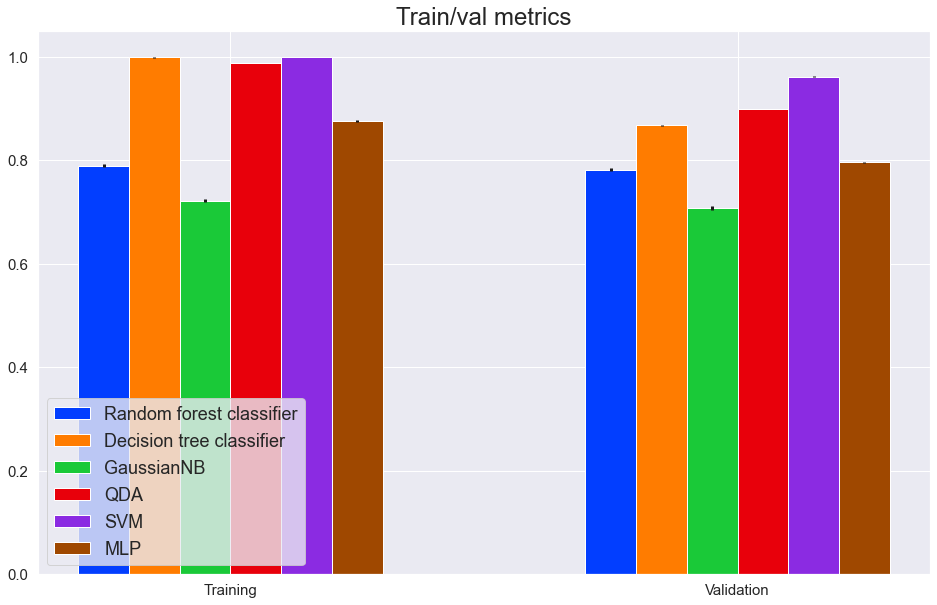

In [14]:
barplot_multiple_columns(groups=['Training', 'Validation'],
                         elements_group=df_train_metric['model'].unique(),
                         data=metrics,
                         yerr=y_errs,
                         title='Train/val metrics',
                         upper_title=False)

#### Test

Since the accuracy values are similar to f1-score values, it isn't useful show this metric in the plot.

In [15]:
df_test_metric.drop(columns=['acc_mu', 'acc_ci'], inplace=True)

In [16]:
metrics = []
y_errs = []
add_value_array(metrics, df_test_metric, 'metrics', 3)
add_value_array(y_errs, df_test_metric, 'interval', 3)

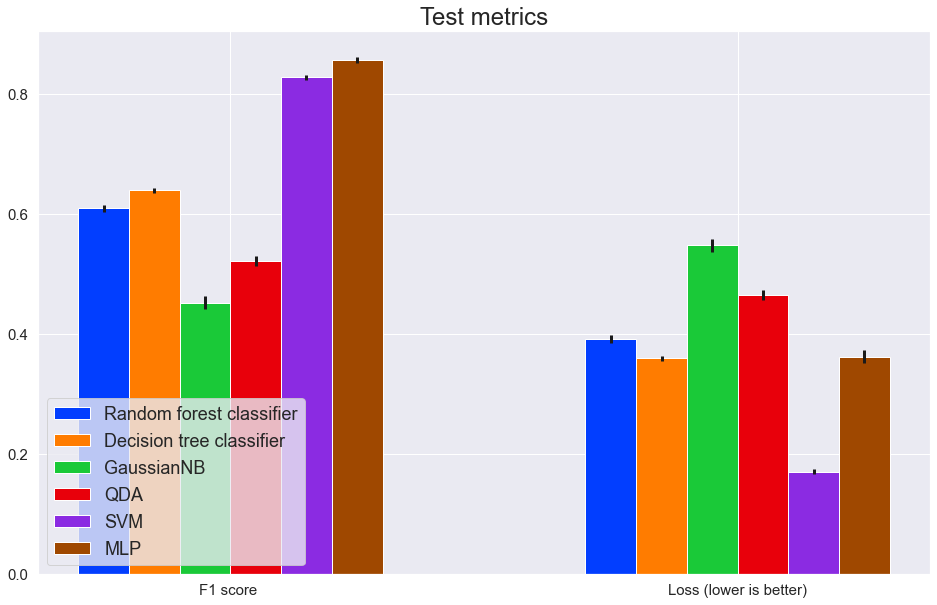

In [17]:
barplot_multiple_columns(groups=['F1 score ', 'Loss (lower is better)'],
                         elements_group=df_test_metric['model'].unique(),
                         data=metrics,
                         yerr=y_errs,
                         title='Test metrics',
                         upper_title=False)